In [12]:
import pandas as pd
import numpy as np

In [13]:
df1 = pd.read_csv('olist_orders_dataset.csv')
df2 = pd.read_csv('olist_order_reviews_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')
d4=pd.read_csv('olist_order_items_dataset.csv')
df5=pd.read_csv('olist_customers_dataset.csv')
df6=pd.read_csv('olist_products_dataset.csv')
df7=pd.read_csv('product_category_name_translation.csv')

In [14]:
df_mergel = pd.merge(df2, df1, on='order_id')

In [15]:
df_merge2=pd.merge(df_mergel, df3, on='order_id')

In [16]:
d_merge3=pd.merge(df_merge2, d4, on='order_id')

In [17]:
df_merge4 = pd.merge(d_merge3, df5, on='customer_id')

In [18]:
df_merge5 = pd.merge(df_merge4, df6, on='product_id')
df = pd.merge(df_merge5, df7, on='product_category_name')

In [19]:
df.isnull().sum()

review_id                             0
order_id                              0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_unique_id                    0


In [20]:

tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column Type'}) 
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
pd.set_option('display.max_columns', None)
tab_info

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
column Type,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,int64,object,int64,float64,int64,object,object,object,float64,float64,object,int64,object,object,object,float64,float64,float64,float64,float64,float64,float64,object
null values (nb),0,0,0,101808,66703,0,0,0,0,0,14,1195,2400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
null values (%),0.0,0.0,0.0,88.062348,57.697065,0.0,0.0,0.0,0.0,0.0,0.01211,1.033657,2.075963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000865,0.000865,0.000865,0.000865,0.0


In [21]:
# drop all irrelevant columns for our test df
df = df.drop(columns=[ 'review_comment_title', 'review_comment_message', 
                      'order_status',
                           'product_weight_g','product_photos_qty','product_description_lenght',
                          'product_height_cm','product_width_cm','product_length_cm'])


In [26]:
df.isnull().sum()

review_id                           0
order_id                            0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
customer_id                         0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name               0
product_name

In [23]:

#impute the missing value
df['product_category_name'].fillna(value=df['product_category_name'].mode()[0], inplace=True)
df['product_name_lenght'].fillna(value=df['product_name_lenght'].mode()[0], inplace=True)


In [24]:
### Create datetimes
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])



In [25]:
display(df)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,1,credit_card,8,397.26,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,esporte_lazer,42.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,1,credit_card,8,397.26,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,esporte_lazer,42.0,sports_leisure
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,2018-04-10,2018-04-11 11:30:43,b1757da2a461d581e1a3b280ca181b7c,2018-03-26 11:02:31,2018-03-26 11:15:38,2018-03-26 22:58:37,2018-04-09 21:53:23,2018-04-27,1,credit_card,3,205.26,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-04-02 11:15:38,185.00,20.26,059ba8400bf965adf606ecc7ef3396e9,95860,taquari,RS,esporte_lazer,42.0,sports_leisure
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,2017-12-28,2017-12-30 12:07:50,da2bd16b131bc90653b87fe4d8fd266e,2017-12-07 20:33:24,2017-12-07 20:51:05,2017-12-08 18:12:34,2017-12-27 18:19:53,2018-01-08,1,credit_card,2,202.05,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2017-12-14 20:51:05,185.00,17.05,62a25a159f9fd2ab7c882d9407f49aa9,36500,uba,MG,esporte_lazer,42.0,sports_leisure
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,1,credit_card,10,1333.25,1,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC,esporte_lazer,48.0,sports_leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,ad0de1dda4fa03e8efb68c481b31ebf8,2ef4a11b6e24fdfbb43b92cb5f95edff,3,2018-07-28,2018-08-03 01:58:42,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06,1,credit_card,1,84.63,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,artes_e_artesanato,32.0,arts_and_craftmanship
115605,ad0de1dda4fa03e8efb68c481b31ebf8,2ef4a11b6e24fdfbb43b92cb5f95edff,3,2018-07-28,2018-08-03 01:58:42,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06,1,credit_card,1,84.63,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,artes_e_artesanato,57.0,arts_and_craftmanship
115606,a6aa76a7e7d8d5cc16f841cfb1619dbc,1c3f752b9a4d09bf1e016439a427d5f8,5,2018-08-22,2018-08-23 00:52:09,7fe022a904d647429c6e08a8f34c9b22,2018-08-17 23:21:15,2018-08-17 23:35:14,2018-08-20 13:59:00,2018-08-21 19:36:43,2018-08-23,1,debit_card,1,23.88,1,56a1efb30499b4dffd45c8d655199b11,55f7a3319d80f7fdf078b8f03e6725

In [27]:
df.dtypes

review_id                                object
order_id                                 object
review_score                              int64
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
customer_id                              object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           

In [28]:
## Review time delta
# create a column with timedelta as total hours, as a float type
df['review_tot_hour_diff'] = (df.review_answer_timestamp - df.review_creation_date) / pd.Timedelta(hours=1)
# create a colume with timedelta as total minutes, as a float type
df['review_tot_mins_diff'] = (df.review_answer_timestamp - df.review_creation_date) / pd.Timedelta(minutes=1)

# purchase time delta: payment approval time difference
df['purchase_tot_hour_diff'] = (df.order_approved_at - df.order_purchase_timestamp) / pd.Timedelta(hours=1)
df['purchase_tot_mins_diff'] = (df.order_approved_at - df.order_purchase_timestamp) / pd.Timedelta(minutes=1)

# delivery time delta
df['delivery_actual_tot_hour_diff'] = (df.order_delivered_customer_date - df.order_delivered_carrier_date) / pd.Timedelta(hours=1)
df['delivery_actual_tot_mins_diff'] = (df.order_delivered_customer_date - df.order_delivered_carrier_date) / pd.Timedelta(minutes=1)


df['delivery_actual_tot_days_diff'] = (df.order_delivered_customer_date - df.order_delivered_carrier_date) / pd.Timedelta(days=1)



In [29]:
df.dtypes

review_id                                object
order_id                                 object
review_score                              int64
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
customer_id                              object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           

In [30]:
round(pd.crosstab(df['order_item_id'], df['review_score'], normalize='index') *100,2)[:12].T

order_item_id,1,2,3,4,5,6,7,8,9,10,11,12
review_score,,,,,,,,,,,,
1,11.02,21.88,25.41,28.38,29.04,32.42,41.67,40.00,50.00,52.0,47.06,50.00
2,3.16,5.69,6.19,6.30,6.11,3.91,3.33,0.00,0.00,0.0,0.00,0.00
3,8.27,9.36,9.37,8.98,9.17,10.16,13.33,14.29,14.29,16.0,17.65,8.33
4,19.41,16.05,16.08,15.69,16.38,16.02,15.00,20.00,17.86,12.0,17.65,16.67
5,58.15,47.02,42.95,40.66,39.30,37.50,26.67,25.71,17.86,20.0,17.65,25.00


In [31]:
%matplotlib inline

In [32]:
df['review_score'].value_counts()

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64

<AxesSubplot:xlabel='review_score', ylabel='count'>

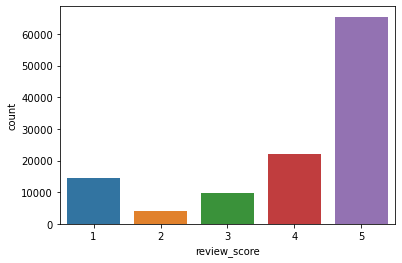

In [33]:
import seaborn as sns
sns.countplot(x="review_score", data=df)

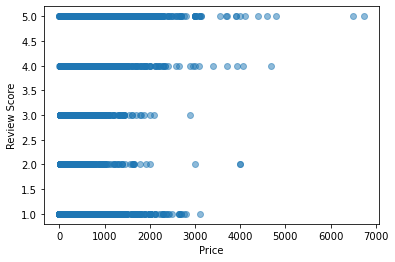

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['price'],df['review_score'], alpha=0.5)
plt.xlabel("Price")
plt.ylabel('Review Score')
plt.show()

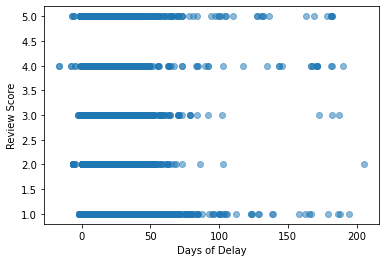

In [44]:
plt.scatter(df['delivery_actual_tot_days_diff'],df['review_score'], alpha=0.5)
plt.xlabel("Days of Delay")
plt.ylabel('Review Score')
plt.show()

(array([2.0000e+00, 2.2000e+01, 1.5730e+04, 5.4014e+04, 2.5185e+04,
        9.7580e+03, 4.3060e+03, 1.9450e+03, 1.0210e+03, 5.4900e+02,
        2.6600e+02, 1.4700e+02, 7.3000e+01, 5.7000e+01, 2.7000e+01,
        1.9000e+01, 1.2000e+01, 6.0000e+00, 9.0000e+00, 1.1000e+01,
        2.0000e+00, 1.0000e+00, 3.0000e+00, 5.0000e+00, 4.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 7.0000e+00,
        6.0000e+00, 2.0000e+00, 8.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00]),
 array([-16.09616898,  -9.94930395,  -3.80243891,   2.34442612,
          8.49129115,  14.63815619,  20.78502122,  26.93188625,
         33.07875129,  39.22561632,  45.37248135,  51.51934639,
         57.66621142,  63.81307645,  69.95994149,  76.10680652,
         82.25367155,  88.40053659,  94.54740162, 100.69426665,
        106.84113169, 112.98799672, 119.13486175, 125.28172679,
        131.42859182, 137.57545685, 143.72232189, 149.86918692,
        156.01605195, 162.16291699, 168.30978202, 174.

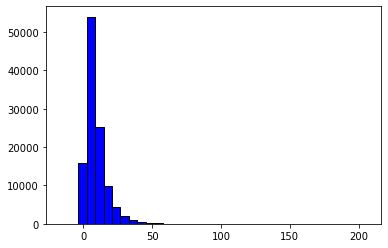

In [45]:
plt.hist(df['delivery_actual_tot_days_diff'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))


In [46]:
#Values that are rated more than 3 are labelled as positive and those whose values are 3 or below are labelled as negative.
df['review_score_dummy'] = df['review_score'].apply(lambda x: 1 if x > 3 else 0)

In [47]:
pie=df.groupby('review_score_dummy')['review_score'].count()

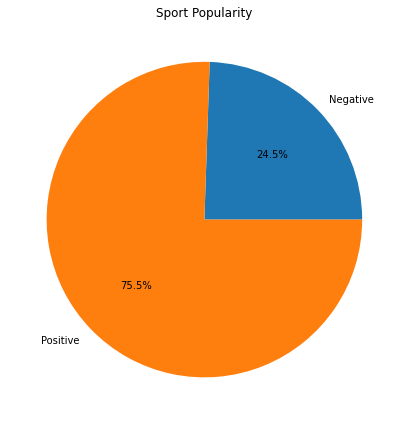

In [48]:
labels = ['Negative','Positive']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(pie, labels=labels,autopct='%.1f%%')
ax.set_title('Sport Popularity')
plt.tight_layout()

75% of the customers rated positive and 24.5% of customers rated nagetive.

Text(0, 0.5, 'Count')

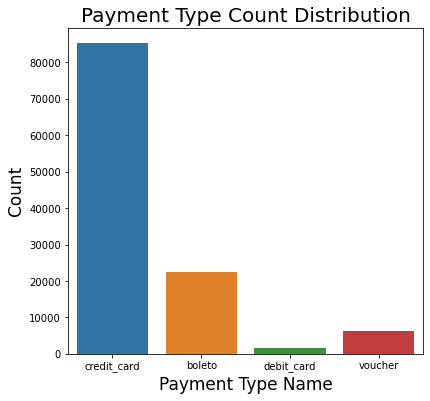

In [49]:
plt.figure(figsize=(14,6))



plt.subplot(121)
g = sns.countplot(x='payment_type', data=df[df['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

[Text(0, 0, 'SP'),
 Text(1, 0, 'RS'),
 Text(2, 0, 'MG'),
 Text(3, 0, 'SC'),
 Text(4, 0, 'BA'),
 Text(5, 0, 'PE'),
 Text(6, 0, 'SE'),
 Text(7, 0, 'RJ'),
 Text(8, 0, 'PR'),
 Text(9, 0, 'GO'),
 Text(10, 0, 'AM'),
 Text(11, 0, 'DF'),
 Text(12, 0, 'MT'),
 Text(13, 0, 'ES'),
 Text(14, 0, 'CE'),
 Text(15, 0, 'PB'),
 Text(16, 0, 'AC'),
 Text(17, 0, 'MA'),
 Text(18, 0, 'MS'),
 Text(19, 0, 'AP'),
 Text(20, 0, 'TO'),
 Text(21, 0, 'AL'),
 Text(22, 0, 'PA'),
 Text(23, 0, 'RN'),
 Text(24, 0, 'PI'),
 Text(25, 0, 'RR'),
 Text(26, 0, 'RO')]

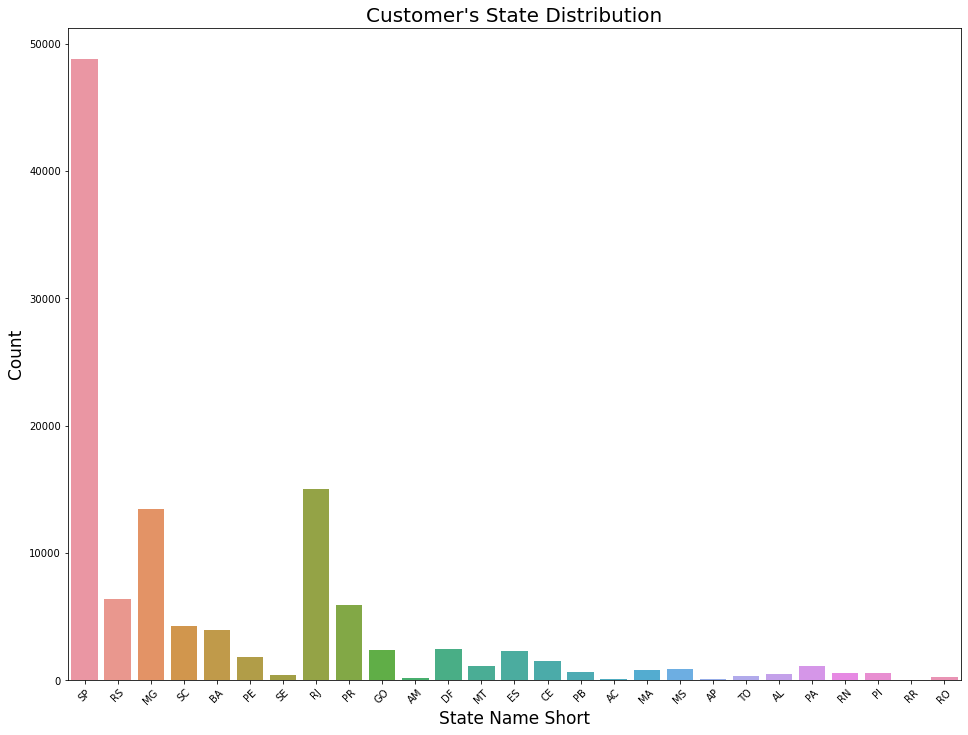

In [50]:
plt.figure(figsize=(16,12))
g = sns.countplot(x='customer_state', data=df, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

 We can see that the most common state of CUSTOMERS is SP, followed by RJ and MG.
All this states is from the southeast region of Brazil. Also, we have many sales to RS, PR, SC (states from south region).

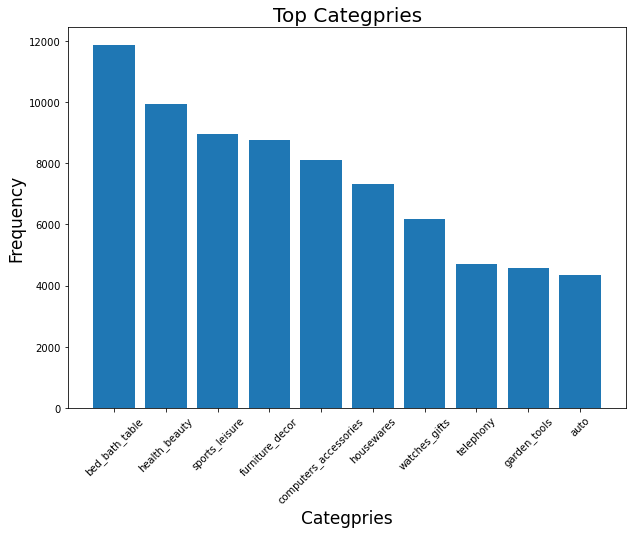

In [51]:
frequency_df = df.drop_duplicates().groupby(
    by=['product_category_name_english'], as_index=False)['order_purchase_timestamp'].count()
frequency_df.columns = ['product_category_name_english', 'Frequency']
x=frequency_df.sort_values(by='Frequency',ascending=False)

fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(x.product_category_name_english[0:10],x.Frequency[0:10])
plt.title("Top Categpries", fontsize=20)
plt.xlabel("Categpries", fontsize=17)
plt.ylabel("Frequency", fontsize=17)
plt.xticks(rotation = 45)
# Show Plot
plt.show()

In [52]:
x.head(10)

,product_category_name_english,Frequency
7,bed_bath_table,11847
43,health_beauty,9944
65,sports_leisure,8942
39,furniture_decor,8743
15,computers_accessories,8105
49,housewares,7331
70,watches_gifts,6161
68,telephony,4692
42,garden_tools,4558
5,auto,4356


The top 10 most popular product categories in terms of the frequency of purchase. The category ‘bed bath table’ is significantly more popular than most of the other categories. It is the only category whose sales have crossed 10000 units. The category in the 12th position‘auto’ only had around 4356 units sold.

In [53]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,review_tot_hour_diff,review_tot_mins_diff,purchase_tot_hour_diff,purchase_tot_mins_diff,delivery_actual_tot_hour_diff,delivery_actual_tot_mins_diff,delivery_actual_tot_days_diff,review_score_dummy
review_score,1.000000,-0.004336,-0.043014,-0.082848,-0.128691,-0.005057,-0.038282,-0.023981,-0.006232,0.010015,0.010015,-0.024090,-0.024090,-0.268123,-0.268123,-0.268123,0.905732
payment_sequential,-0.004336,1.000000,-0.085688,-0.064113,-0.002063,0.006743,0.019666,-0.021150,-0.005522,0.001081,0.001081,0.018235,0.018235,-0.002309,-0.002309,-0.002309,-0.000922
payment_installments,-0.043014,-0.085688,1.000000,0.274698,0.074583,0.279899,0.186068,0.056822,0.020755,-0.000844,-0.000844,-0.147041,-0.147041,0.048095,0.048095,0.048095,-0.042693
payment_value,-0.082848,-0.064113,0.274698,1.000000,0.256610,0.740246,0.373991,0.052696,0.003256,-0.001181,-0.001181,0.052970,0.052970,0.025773,0.025773,0.025773,-0.070223
order_item_id,-0.128691,-0.002063,0.074583,0.256610,1.000000,-0.060985,-0.030591,-0.003420,-0.023222,0.002088,0.002088,0.042245,0.042245,-0.039027,-0.039027,-0.039027,-0.115866
price,-0.005057,0.006743,0.279899,0.740246,-0.060985,1.000000,0.414640,0.043081,0.017789,-0.001842,-0.001842,0.017486,0.017486,0.040307,0.040307,0.040307,0.001298
freight_value,-0.038282,0.019666,0.186068,0.373991,-0.030591,0.414640,1.000000,0.225655,0.022470,0.002029,0.002029,0.032269,0.032269,0.195226,0.195226,0.195226,-0.032775
customer_zip_code_prefix,-0.023981,-0.021150,0.056822,0.052696,-0.003420,0.043081,0.225655,1.000000,0.016064,0.007048,0.007048,0.035629,0.035629,0.294087,0.294087,0.294087,-0.019856
product_name_lenght,-0.006232,-0.005522,0.020755,0.003256,-0.023222,0.017789,0.022470,0.016064,1.000000,-0.003917,-0.003917,0.006837,0.006837,0.015506,0.015506,0.015506,-0.005415
review_tot_hour_diff,0.010015,0.001081,-0.000844,-0.001181,0.002088,-0.001842,0.002029,0.007048,-0.003917,1.000000,1.000000,0.001944,0.001944,0.008117,0.008117,0.008117,0.010305


In [54]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_category_name_english', 'review_tot_hour_diff',
       'review_tot_mins_diff', 'purchase_tot_hour_diff',
       'purchase_tot_mins_diff', 'delivery_actual_tot_hour_diff',
       'delivery_actual_tot_mins_diff', 'delivery_actual_tot_days_diff',
       'review_score_dummy'],
      dtype='object')

In [55]:
df['order_delivered_carrier_year']=df['order_delivered_carrier_date'].dt.year
df['order_delivered_carrier_month']=df['order_delivered_carrier_date'].dt.month
df['order_delivered_carrier_week']=df['order_delivered_carrier_date'].dt.week
df['order_delivered_carrier_day']=df['order_delivered_carrier_date'].dt.day
df['order_delivered_carrier_hour']=df['order_delivered_carrier_date'].dt.hour

<ipython-input-55-6813f2940e9e>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['order_delivered_carrier_week']=df['order_delivered_carrier_date'].dt.week


In [56]:
df['order_delivered_customer_year']=df['order_delivered_customer_date'].dt.year
df['order_delivered_customer_month']=df['order_delivered_customer_date'].dt.month
df['order_delivered_customer_week']=df['order_delivered_customer_date'].dt.week
df['order_delivered_customer_day']=df['order_delivered_customer_date'].dt.day
df['order_delivered_customer_hour']=df['order_delivered_customer_date'].dt.hour

<ipython-input-56-10f036532f0a>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['order_delivered_customer_week']=df['order_delivered_customer_date'].dt.week


In [57]:
df['order_estimated_delivery_year']=df['order_estimated_delivery_date'].dt.year
df['order_estimated_delivery_month']=df['order_estimated_delivery_date'].dt.month
df['order_estimated_delivery_week']=df['order_estimated_delivery_date'].dt.week
df['order_estimated_delivery_day']=df['order_estimated_delivery_date'].dt.day
df['order_estimated_delivery_hour']=df['order_estimated_delivery_date'].dt.hour

<ipython-input-57-c5e34ed93f43>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['order_estimated_delivery_week']=df['order_estimated_delivery_date'].dt.week


In [58]:
df['shipping_limit_year']=df['shipping_limit_date'].dt.year
df['shipping_limit_month']=df['shipping_limit_date'].dt.month
df['shipping_limit_week']=df['shipping_limit_date'].dt.week
df['shipping_limit_day']=df['shipping_limit_date'].dt.day
df['shipping_limit_hour']=df['shipping_limit_date'].dt.hour

<ipython-input-58-54adc4f2602f>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['shipping_limit_week']=df['shipping_limit_date'].dt.week


In [59]:
df.drop(columns=['review_answer_timestamp','order_approved_at','order_purchase_timestamp',
                 'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_creation_date',
                   'payment_sequential','shipping_limit_date','payment_type','customer_unique_id',
                  'product_category_name_english','customer_city'],inplace=True)

In [61]:
#Check and drop the highly correlated variables
cor_matrix = df.corr().abs()
cor_matrix

,review_score,payment_installments,payment_value,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,review_tot_hour_diff,review_tot_mins_diff,purchase_tot_hour_diff,purchase_tot_mins_diff,delivery_actual_tot_hour_diff,delivery_actual_tot_mins_diff,delivery_actual_tot_days_diff,review_score_dummy,order_delivered_carrier_year,order_delivered_carrier_month,order_delivered_carrier_week,order_delivered_carrier_day,order_delivered_carrier_hour,order_delivered_customer_year,order_delivered_customer_month,order_delivered_customer_week,order_delivered_customer_day,order_delivered_customer_hour,order_estimated_delivery_year,order_estimated_delivery_month,order_estimated_delivery_week,order_estimated_delivery_day,order_estimated_delivery_hour,shipping_limit_year,shipping_limit_month,shipping_limit_week,shipping_limit_day,shipping_limit_hour
review_score,1.000000,0.043014,0.082848,0.128691,0.005057,0.038282,0.023981,0.006232,0.010015,0.010015,0.024090,0.024090,0.268123,0.268123,0.268123,0.905732,0.017442,0.029907,0.029633,0.000154,0.017348,0.038316,0.041779,0.041935,0.001621,0.012747,0.013326,0.035541,0.036357,0.009749,NaN,0.006623,0.026380,0.026803,0.004205,0.010353
payment_installments,0.043014,1.000000,0.274698,0.074583,0.279899,0.186068,0.056822,0.020755,0.000844,0.000844,0.147041,0.147041,0.048095,0.048095,0.048095,0.042693,0.049820,0.029734,0.029499,0.002074,0.002591,0.046859,0.028892,0.027815,0.006986,0.007749,0.049182,0.035332,0.035096,0.002150,NaN,0.051302,0.030863,0.029876,0.000807,0.201424
payment_value,0.082848,0.274698,1.000000,0.256610,0.740246,0.373991,0.052696,0.003256,0.001181,0.001181,0.052970,0.052970,0.025773,0.025773,0.025773,0.070223,0.007530,0.009081,0.007596,0.016085,0.010647,0.006084,0.012918,0.012090,0.009187,0.012010,0.002781,0.017634,0.017726,0.001397,NaN,0.003679,0.011191,0.010065,0.011297,0.003062
order_item_id,0.128691,0.074583,0.256610,1.000000,0.060985,0.030591,0.003420,0.023222,0.002088,0.002088,0.042245,0.042245,0.039027,0.039027,0.039027,0.115866,0.004920,0.002549,0.002582,0.003003,0.008052,0.000922,0.006869,0.006931,0.001010,0.006321,0.000256,0.009519,0.009196,0.001943,NaN,0.002393,0.004970,0.004910,0.000601,0.033376
price,0.005057,0.279899,0.740246,0.060985,1.000000,0.414640,0.043081,0.017789,0.001842,0.001842,0.017486,0.017486,0.040307,0.040307,0.040307,0.001298,0.000210,0.001072,0.000014,0.011788,0.003990,0.000638,0.003413,0.002968,0.003544,0.007639,0.002279,0.006207,0.006394,0.002068,NaN,0.003072,0.003963,0.002888,0.009646,0.033119
freight_value,0.038282,0.186068,0.373991,0.030591,0.414640,1.000000,0.225655,0.022470,0.002029,0.002029,0.032269,0.032269,0.195226,0.195226,0.195226,0.032775,0.036046,0.007095,0.006203,0.010079,0.022429,0.044427,0.010692,0.010901,0.001140,0.006423,0.037017,0.024011,0.023757,0.004059,NaN,0.033381,0.007956,0.007263,0.006713,0.012645
customer_zip_code_prefix,0.023981,0.056822,0.052696,0.003420,0.043081,0.225655,1.000000,0.016064,0.007048,0.007048,0.035629,0.035629,0.294087,0.294087,0.294087,0.019856,0.034587,0.004488,0.005529,0.011104,0.007232,0.019112,0.006705,0.007216,0.009160,0.002115,0.023263,0.006761,0.005731,0.011831,NaN,0.035354,0.003634,0.004657,0.009954,0.012918
product_name_lenght,0.006232,0.020755,0.003256,0.023222,0.017789,0.022470,0.016064,1.000000,0.003917,0.003917,0.006837,0.006837,0.015506,0.015506,0.015506,0.005415,0.019260,0.011033,0.011544,0.006477,0.007093,0.021469,0.009245,0.009322,0.000934,0.015178,0.020859,0.012384,0.012475,0.000689,NaN,0.021696,0.009493,0.009786,0.001882,0.000189
review_tot_hour_diff,0.010015,0.000844,0.001181,0.002088,0.001842,0.002029,0.007048,0.003917,1.000000,1.000000,0.001944,0.001944,0.008117,0.008117,0.008117,0.010305,0.031202,0.006335,0.006820,0.003368,0.001527,0.031477,0.006478,0.005974,0.007077,0.001249,0.030389,0.007323,0.007611,0.001493,NaN,0.031567,0.006800,0.006906,0.000926,0.002995
review_tot_mins_diff,0.010015,0.000844,0.001181,0.002088,0.001842,0.002029,0.007048,0.003917,1.000000,1.000000,

In [62]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


<ipython-input-62-0cb03552b6b1>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [63]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)

['review_tot_mins_diff', 'purchase_tot_mins_diff', 'delivery_actual_tot_mins_diff', 'delivery_actual_tot_days_diff', 'review_score_dummy', 'order_delivered_carrier_week', 'order_delivered_customer_year', 'order_delivered_customer_month', 'order_delivered_customer_week', 'order_estimated_delivery_year', 'order_estimated_delivery_week', 'shipping_limit_year', 'shipping_limit_month', 'shipping_limit_week']


In [64]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'customer_id',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'price', 'freight_value', 'customer_zip_code_prefix',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'review_tot_hour_diff', 'review_tot_mins_diff',
       'purchase_tot_hour_diff', 'purchase_tot_mins_diff',
       'delivery_actual_tot_hour_diff', 'delivery_actual_tot_mins_diff',
       'delivery_actual_tot_days_diff', 'review_score_dummy',
       'order_delivered_carrier_year', 'order_delivered_carrier_month',
       'order_delivered_carrier_week', 'order_delivered_carrier_day',
       'order_delivered_carrier_hour', 'order_delivered_customer_year',
       'order_delivered_customer_month', 'order_delivered_customer_week',
       'order_delivered_customer_day', 'order_delivered_customer_hour',
       'order_estimated_delivery_year', 'order_estimated_delivery_month',
       'order_estimated_deli

In [65]:
df.drop(columns=['review_tot_mins_diff', 'purchase_tot_mins_diff',
                 'delivery_actual_tot_mins_diff', 'delivery_actual_tot_days_diff',
                 'review_score','review_id','order_id' ,'customer_id','order_item_id','product_id',
                 'order_delivered_carrier_week', 'order_delivered_customer_year',  'seller_id',
                 'order_delivered_customer_month', 'order_delivered_customer_week', 'order_estimated_delivery_year', 'order_estimated_delivery_week',
                 'shipping_limit_year', 'shipping_limit_month', 'shipping_limit_week'],inplace=True)

In [66]:
df.dtypes

payment_installments                int64
payment_value                     float64
price                             float64
freight_value                     float64
customer_zip_code_prefix            int64
customer_state                     object
product_category_name              object
product_name_lenght               float64
review_tot_hour_diff              float64
purchase_tot_hour_diff            float64
delivery_actual_tot_hour_diff     float64
review_score_dummy                  int64
order_delivered_carrier_year      float64
order_delivered_carrier_month     float64
order_delivered_carrier_day       float64
order_delivered_carrier_hour      float64
order_delivered_customer_day      float64
order_delivered_customer_hour     float64
order_estimated_delivery_month      int64
order_estimated_delivery_day        int64
order_estimated_delivery_hour       int64
shipping_limit_day                  int64
shipping_limit_hour                 int64
dtype: object

In [67]:
df.drop(columns=['product_category_name'],inplace=True)

In [68]:
# Turn state into dummies
df=pd.get_dummies(df,drop_first=True)

In [69]:
df.columns

Index(['payment_installments', 'payment_value', 'price', 'freight_value',
       'customer_zip_code_prefix', 'product_name_lenght',
       'review_tot_hour_diff', 'purchase_tot_hour_diff',
       'delivery_actual_tot_hour_diff', 'review_score_dummy',
       'order_delivered_carrier_year', 'order_delivered_carrier_month',
       'order_delivered_carrier_day', 'order_delivered_carrier_hour',
       'order_delivered_customer_day', 'order_delivered_customer_hour',
       'order_estimated_delivery_month', 'order_estimated_delivery_day',
       'order_estimated_delivery_hour', 'shipping_limit_day',
       'shipping_limit_hour', 'customer_state_AL', 'customer_state_AM',
       'customer_state_AP', 'customer_state_BA', 'customer_state_CE',
       'customer_state_DF', 'customer_state_ES', 'customer_state_GO',
       'customer_state_MA', 'customer_state_MG', 'customer_state_MS',
       'customer_state_MT', 'customer_state_PA', 'customer_state_PB',
       'customer_state_PE', 'customer_state_PI',

In [70]:
df.dropna(inplace=True)

In [71]:
df.isnull().sum()

payment_installments              0
payment_value                     0
price                             0
freight_value                     0
customer_zip_code_prefix          0
product_name_lenght               0
review_tot_hour_diff              0
purchase_tot_hour_diff            0
delivery_actual_tot_hour_diff     0
review_score_dummy                0
order_delivered_carrier_year      0
order_delivered_carrier_month     0
order_delivered_carrier_day       0
order_delivered_carrier_hour      0
order_delivered_customer_day      0
order_delivered_customer_hour     0
order_estimated_delivery_month    0
order_estimated_delivery_day      0
order_estimated_delivery_hour     0
shipping_limit_day                0
shipping_limit_hour               0
customer_state_AL                 0
customer_state_AM                 0
customer_state_AP                 0
customer_state_BA                 0
customer_state_CE                 0
customer_state_DF                 0
customer_state_ES           

In [72]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import ShuffleSplit

In [73]:
X = df.drop('review_score_dummy',axis=1)
y = df['review_score_dummy'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
#determine the Mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info= mutual_info_classif(X_train.fillna(0), y_train)


In [75]:
mutual_info =pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

delivery_actual_tot_hour_diff     0.088710
review_tot_hour_diff              0.074196
payment_value                     0.048073
customer_zip_code_prefix          0.037369
purchase_tot_hour_diff            0.033787
freight_value                     0.016362
price                             0.013558
order_estimated_delivery_month    0.006515
order_delivered_carrier_hour      0.005262
order_delivered_carrier_month     0.004773
customer_state_SP                 0.004591
order_delivered_carrier_year      0.004542
customer_state_DF                 0.002791
customer_state_RJ                 0.002718
product_name_lenght               0.002707
payment_installments              0.002587
customer_state_PB                 0.002032
customer_state_PA                 0.001800
customer_state_RS                 0.001773
order_delivered_customer_day      0.001410
shipping_limit_hour               0.001258
customer_state_BA                 0.001247
shipping_limit_day                0.001189
order_deliv

Text(0.5, 1.0, 'Feature Importance of Training Data')

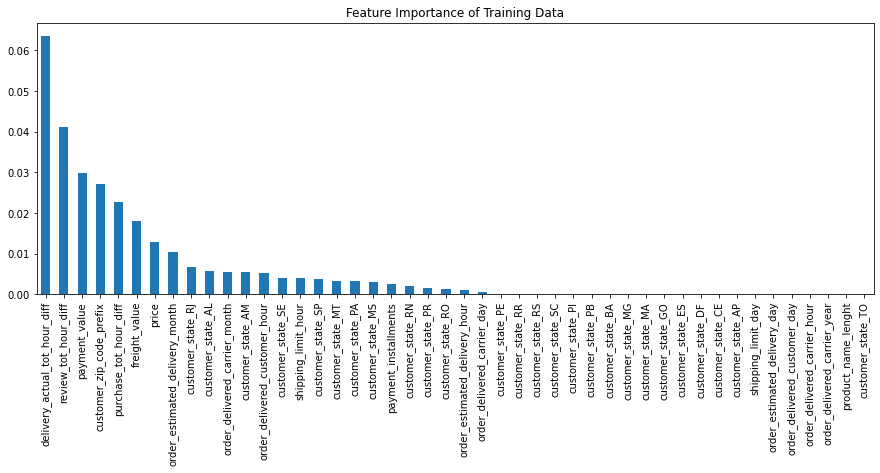

In [83]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5)) 
plt.title('Feature Importance of Training Data')
#plotting the features in the descending order of their dependency values

In [82]:
from sklearn.feature_selection import SelectKBest

#Taking top 20 important features
X_train_new= SelectKBest(mutual_info_regression, k=20).fit_transform(X_train.fillna(0),y_train)
print(X_train_new.shape,y_train.shape)

KeyboardInterrupt: 

In [85]:
mutual_info= mutual_info_regression(X_test.fillna(0), y_test)
mutual_info =pd.Series(mutual_info)
mutual_info.index=X_test.columns
mutual_info.sort_values(ascending=False)

delivery_actual_tot_hour_diff     0.062778
review_tot_hour_diff              0.040565
payment_value                     0.027132
customer_zip_code_prefix          0.027048
purchase_tot_hour_diff            0.016994
freight_value                     0.015603
customer_state_SP                 0.009773
price                             0.009117
customer_state_PR                 0.008622
order_delivered_carrier_month     0.004576
order_delivered_customer_day      0.003849
customer_state_PI                 0.002912
customer_state_PE                 0.002441
customer_state_PB                 0.002313
customer_state_RJ                 0.002174
product_name_lenght               0.001818
customer_state_DF                 0.001814
order_delivered_carrier_hour      0.001658
payment_installments              0.001508
customer_state_RN                 0.001127
order_estimated_delivery_month    0.001042
customer_state_MT                 0.000900
customer_state_AL                 0.000691
customer_st

Text(0.5, 1.0, 'Feature Importance of Test Data')

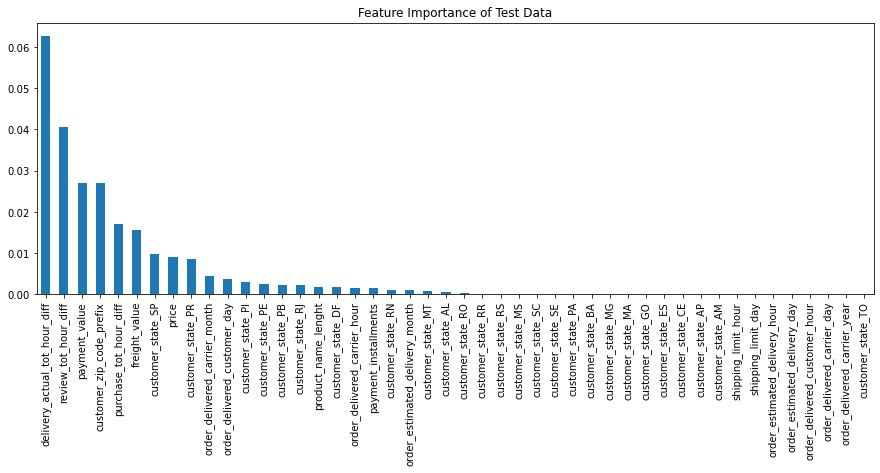

In [86]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Feature Importance of Test Data')

In [87]:
X_test_new= SelectKBest(mutual_info_regression, k=20).fit_transform(X_test.fillna(0),y_test)
X_test_new.shape

(33959, 20)

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=10,n_estimators=100, random_state=40,max_features=2)
forest.fit(X_train_new,y_train)
print(forest.score(X_train_new,y_train))
print(forest.score(X_test_new,y_test))

0.7998106897204518
0.7904531935569363


In [130]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier(max_depth=10,random_state=42)
dtc_clf.fit(X_train_new,y_train)
print(dtc_clf.score(X_train_new,y_train))
print(dtc_clf.score(X_test_new,y_test))

0.813933236574746
0.7797343855826143


In [132]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(solver="lbfgs",penalty='none',random_state=42,max_iter=50000)
log_clf.fit(X_train_new,y_train)
print(log_clf.score(X_train_new,y_train))
print(log_clf.score(X_test_new,y_test))

0.7847920742096296
0.7310285933036897


In [124]:
#Bagged Tree
#Base estimator is decision tree classifieer
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5, max_features=0.5)
bagging.fit(X_train_new,y_train)
print(bagging.score(X_train_new,y_train))
print(bagging.score(X_test_new,y_test))

0.9523947750362844
0.7285255749580376


In [146]:
#Gradient Bossting Classifier (Boosted Tree)
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=60, learning_rate=0.4,max_depth=2, random_state=44)
boosting.fit(X_train_new,y_train)
print(boosting.score(X_train_new,y_train))
print(boosting.score(X_test_new,y_test))


0.7980690351486086
0.7973438558261433


In [ ]:
# We Chose Random Forest for Parameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid={'kernelridge__alpha':[0.0001,0.001,0.01,0.05,0.1,0.25,0.5],'kernelridge__gamma':[0.01,0.05,0.25,0.5,1],
            'kernelridge__kernel':['rbf']}

shuffle = ShuffleSplit(n_splits=nmc, test_size=.25, random_state=10)
# set up search
grid_search=GridSearchCV(fullModel2,param_grid,cv=shuffle,
                              return_train_score=True,n_jobs=-1)
# implement search
grid_search.fit(XOrd,ynew)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_kernelridge__alpha','param_kernelridge__gamma']])

# Print best params and model
print("Best Param:",grid_search.best_params_)
print("Best Model:",grid_search.best_estimator_)
print("Best Test Score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_


In [156]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()
param_grid = {'max_depth': [5, 10, 15, 20], 'max_features': [4,6,8,10], 'n_estimators': [50, 100, 150, 200]}

grid_search=GridSearchCV(forest,param_grid,cv=3,
                              return_train_score=True,n_jobs=-1)

grid_search.fit(X_train_new,y_train)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
#print(results[['rank_test_score','mean_test_score']])

# Print best params and model
print("Best Param:",grid_search.best_params_)
print("Best Model:",grid_search.best_estimator_)
print("Best Test Score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_



Best Param: {'max_depth': 20, 'max_features': 10, 'n_estimators': 150}
Best Model: RandomForestClassifier(max_depth=20, max_features=10, n_estimators=150)
Best Test Score: 0.8305925255112148


In [165]:
forest = RandomForestClassifier(max_depth=20,n_estimators=150, random_state=40,max_features=20)
forest.fit(X_train_new,y_train)
print(forest.score(X_train_new,y_train))
print(forest.score(X_test_new,y_test))

0.9112387202625103
0.8123030713507465


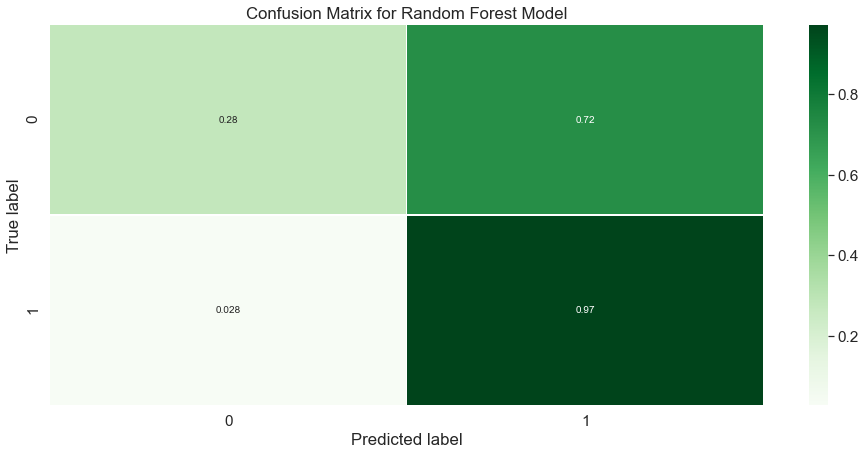

In [168]:
# Confusion Matrix using the Test set
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_test = forest.predict(X_test_new)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
#class_names = [
    

#tick_marks = np.arange(len(class_names))
#tick_marks2 = tick_marks + 0.5
#plt.xticks(tick_marks, class_names, rotation=25)
#plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [178]:
matrix = confusion_matrix(y_test, y_pred_test)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix
#matrix.sum(axis=1)

array([[ 2170,  5644],
       [  730, 25415]], dtype=int64)

In [182]:
test_pred_NPS = ((25415+5644)-(2170+730))/(25415+5644+2170+730)
print('Predicted NPS of the Test set is', test_pred_NPS)
test_true_NPS = ((730+25415)-(2170+5644))/((25415+5644+2170+730))
print('True NPS of the Test set is', test_true_NPS)

Predicted NPS of the Test set is 0.829205807002562
True NPS of the Test set is 0.5397979916958685


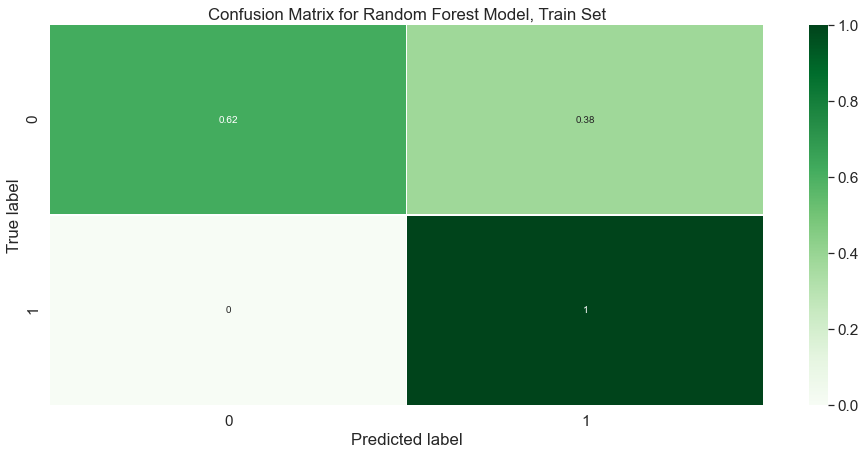

In [185]:
# Confusion matrix and NPS calculation using the Train Set

y_pred_train = forest.predict(X_train_new)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_train, y_pred_train)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
#class_names = [
    

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model, Train Set')
plt.show()

In [187]:
matrix = confusion_matrix(y_train, y_pred_train)
matrix

array([[11390,  7033],
       [    0, 60812]], dtype=int64)

In [188]:
train_pred_NPS = ((60812+7033)-(11390+0))/(60812+7033+11390+0)
print('Predicted NPS of the Train set is', train_pred_NPS)
train_true_NPS = ((0+60812)-(11390+7033))/(60812+7033+11390+0)
print('True NPS of the Train set is', train_true_NPS)

Predicted NPS of the Train set is 0.7125007887928314
True NPS of the Train set is 0.534978229317852


In [183]:
a = list(df['review_score_dummy'].value_counts())
print(a)
print("NPS of the entire data set is", (a[0]-a[1])/sum(a))


[86957, 26237]
NPS of the entire data set is 0.5364241920949874
